In [1]:
"""Example.

https://www.livsmedelsverket.se/om-oss/psidata/livsmedelsdatbasenalfa

ClimateHub have open source on CHG, but only free for internal use.
"""

import pandas as pd
from co2_meal_planner.rdi import rdi
from co2_meal_planner.slv_wrapper import SlvWrapper
from IPython.display import display

slv = SlvWrapper()



ModuleNotFoundError: No module named 'co2_meal_planner.rdi'

In [ ]:
slv.search_food("paranöt")

menu = {'Mango': {'number': 574, 'weight': 100},
        'cashew': {'number': 1557, 'weight': 65/4},
        'hirs': {'number': 834, 'weight': 1180./5},
        'kikärtor': {'number': 3815, 'weight': 250/4},
        'basilika': {'number': 379, 'weight': 3},
        'apelsin': {'number': 551, 'weight': 80},
        }

slv.get_minerals_from_number(1568)


Paranötter 1568
[{'namn': 'Zink, Zn', 'euroFIRkod': 'ZN', 'forkortning': 'Zn', 'varde': 3.8, 'enhet': 'mg', 'viktGram': 100, 'vardetyp': 'Ett analysvärde av sammansatt prov', 'vardetypkod': 'AV', 'ursprung': 'Analys SLV', 'ursprungkod': 'O', 'publikation': 'Analysprotokoll Dnr 2018/00798', 'metodtyp': 'Analysresultat', 'metodtypkod': 'A', 'metodindikator': 'ICP-MS', 'metodindikatorkod': 'MI1209', 'referenstyp': 'Rapport', 'referenstypkod': 'R'}, {'namn': 'Vitamin E', 'euroFIRkod': 'VITE', 'forkortning': 'VitE', 'varde': 6.1, 'enhet': 'mg', 'viktGram': 100, 'berakning': '6,130', 'vardetyp': 'Bästa skattning', 'vardetypkod': 'BE', 'ursprung': 'Värde framtaget med eget system', 'ursprungkod': 'S', 'publikation': 'SLV - Riktlinjer för livsmedel', 'metodtyp': 'Summering av beståndsdelar', 'metodtypkod': 'S', 'metodindikator': 'Vit E från alfatokoferol', 'metodindikatorkod': 'MI0368', 'referenstyp': 'Rapport', 'referenstypkod': 'R'}, {'namn': 'Vitamin D', 'euroFIRkod': 'VITD', 'forkortning':

[{'namn': 'Zink, Zn',
  'euroFIRkod': 'ZN',
  'forkortning': 'Zn',
  'varde': 3.8,
  'enhet': 'mg',
  'viktGram': 100,
  'vardetyp': 'Ett analysvärde av sammansatt prov',
  'vardetypkod': 'AV',
  'ursprung': 'Analys SLV',
  'ursprungkod': 'O',
  'publikation': 'Analysprotokoll Dnr 2018/00798',
  'metodtyp': 'Analysresultat',
  'metodtypkod': 'A',
  'metodindikator': 'ICP-MS',
  'metodindikatorkod': 'MI1209',
  'referenstyp': 'Rapport',
  'referenstypkod': 'R'},
 {'namn': 'Vitamin E',
  'euroFIRkod': 'VITE',
  'forkortning': 'VitE',
  'varde': 6.1,
  'enhet': 'mg',
  'viktGram': 100,
  'berakning': '6,130',
  'vardetyp': 'Bästa skattning',
  'vardetypkod': 'BE',
  'ursprung': 'Värde framtaget med eget system',
  'ursprungkod': 'S',
  'publikation': 'SLV - Riktlinjer för livsmedel',
  'metodtyp': 'Summering av beståndsdelar',
  'metodtypkod': 'S',
  'metodindikator': 'Vit E från alfatokoferol',
  'metodindikatorkod': 'MI0368',
  'referenstyp': 'Rapport',
  'referenstypkod': 'R'},
 {'namn

In [ ]:

mineral_dict = slv.populate_mineral_dict(menu)
mineral_df = slv.mineral_dict_to_df(mineral_dict)
mineral_df = slv.convert_betakaroten_to_retinol(mineral_df)
display(mineral_df)

mineral_df = slv.calculate_minerals_for_weight(mineral_df)

display(mineral_df)

# calculate total
mineral_df.loc['total'] = mineral_df.sum()

# create an own class for rdi?
rdi_dict = slv.init_mineral_dict()
for gen in rdi['Zink, Zn'].keys():
    for col in rdi_dict.keys():
        if col in rdi.keys():
            rdi_dict[col].append(rdi[col][gen])
        elif col == 'name':
            rdi_dict['name'].append(gen)
        else:
            rdi_dict[col].append(None)

rdi_df = pd.DataFrame.from_dict(rdi_dict)
rdi_df.set_index('name', inplace=True)
mineral_df = pd.concat([mineral_df, rdi_df])

pd.set_option('display.max_columns', 500)
display(mineral_df)

,"Zink, Zn",Vitamin E,Vitamin D,Vitamin C,Vitamin B6,Vitamin B12,Vitamin A,Vatten,Tiamin,Tillsatt socker,Fritt socker,"Selen, Se",Sackaros,Riboflavin,Retinol,Protein,Summa fleromättade fettsyror,"Fosfor, P",Niacinekvivalenter,Niacin,"Salt, NaCl","Natrium, Na",Monosackarider,"Sockerarter, totalt",Summa enkelomättade fettsyror,"Magnesium, Mg",Summa mättade fettsyror,"Kolhydrater, tillgängliga",Kolesterol,"Kalium, K","Jod, I",Fullkorn totalt,Folat,Fibrer,"Fett, totalt","Järn, Fe",Energi (kJ),Energi (kcal),Disackarider,"Kalcium, Ca",Fettsyra 4:0-10:0,DHA (C22:6),DPA (C22:5),EPA (C20:5),Arakidonsyra C20:4,Arakidinsyra C20:0,Linolensyra C18:3,Linolsyra C18:2,Oljesyra C18:1,Stearinsyra C18:0,Palmitoljesyra C16:1,Palmitinsyra C16:0,Myristinsyra C14:0,Laurinsyra C12:0,Betakaroten/β-Karoten,Avfall (skal etc.),Aska,Alkohol,weight
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
havredryck 3per,0.1,0.6,1.1,0.0,0.01,0.38,0.0,87.8,0.02,0.0,0.0,0.0,0.1,0.25,0.000000,1.0,0.8,110.0,0.20,0.08,0.1,42.0,0.0,2.9,1.8,0.0,0.2,6.6,0.0,220.0,22.5,0.0,0.0,0.8,3.0,0.0,248.0,60.0,2.9,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.7,1.7,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.7,0.0,100.0
havregryn,2.6,0.8,0.0,0.0,0.11,0.00,0.0,10.2,0.29,0.0,0.0,0.0,1.0,0.07,0.000000,9.5,2.8,360.0,2.40,0.80,0.0,1.0,0.0,1.0,2.6,110.0,1.1,64.1,0.0,340.0,6.8,100.0,30.2,7.5,7.0,3.4,1569.0,375.0,1.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,2.7,2.4,0.1,0.0,1.0,0.0,0.0,0.0,0.0,1.7,0.0,30.0
Paranötter,3.8,6.1,0.0,0.0,0.33,0.00,0.6,1.8,0.73,0.0,0.0,225.0,1.8,0.00,0.416667,14.2,29.2,723.0,2.90,0.48,0.0,0.0,0.0,1.8,20.1,400.0,15.4,0.0,0.0,623.0,0.0,0.0,5.3,13.7,67.8,2.4,2860.0,683.0,1.8,176.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,29.2,19.9,6.0,0.2,9.2,0.0,0.0,5.0,52.0,3.8,0.0,100.0
äppelmos,0.0,0.1,0.0,1.0,0.03,0.00,2.5,42.0,0.10,30.0,30.0,0.0,8.2,0.02,2.500000,0.2,0.0,24.0,0.23,0.20,0.0,4.0,35.9,44.1,0.0,2.0,0.0,56.9,0.0,112.0,0.0,0.0,1.0,0.7,0.0,0.9,976.0,233.0,8.2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.2,0.0,15.0


,"Zink, Zn",Vitamin E,Vitamin D,Vitamin C,Vitamin B6,Vitamin B12,Vitamin A,Vatten,Tiamin,Tillsatt socker,Fritt socker,"Selen, Se",Sackaros,Riboflavin,Retinol,Protein,Summa fleromättade fettsyror,"Fosfor, P",Niacinekvivalenter,Niacin,"Salt, NaCl","Natrium, Na",Monosackarider,"Sockerarter, totalt",Summa enkelomättade fettsyror,"Magnesium, Mg",Summa mättade fettsyror,"Kolhydrater, tillgängliga",Kolesterol,"Kalium, K","Jod, I",Fullkorn totalt,Folat,Fibrer,"Fett, totalt","Järn, Fe",Energi (kJ),Energi (kcal),Disackarider,"Kalcium, Ca",Fettsyra 4:0-10:0,DHA (C22:6),DPA (C22:5),EPA (C20:5),Arakidonsyra C20:4,Arakidinsyra C20:0,Linolensyra C18:3,Linolsyra C18:2,Oljesyra C18:1,Stearinsyra C18:0,Palmitoljesyra C16:1,Palmitinsyra C16:0,Myristinsyra C14:0,Laurinsyra C12:0,Betakaroten/β-Karoten,Avfall (skal etc.),Aska,Alkohol,weight
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
havredryck 3per,0.10,0.600,1.1,0.00,0.0100,0.38,0.000,87.80,0.020,0.0,0.0,0.0,0.10,0.250,0.000000,1.00,0.80,110.0,0.2000,0.08,0.1,42.0,0.000,2.900,1.80,0.0,0.20,6.600,0.0,220.0,22.50,0.0,0.00,0.800,3.0,0.000,248.0,60.00,2.90,120.00,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.70,1.70,0.00,0.0,0.2,0.0,0.0,0.0,0.0,0.70,0.0,100.00
havregryn,0.78,0.240,0.0,0.00,0.0330,0.00,0.000,3.06,0.087,0.0,0.0,0.0,0.30,0.021,0.000000,2.85,0.84,108.0,0.7200,0.24,0.0,0.3,0.000,0.300,0.78,33.0,0.33,19.230,0.0,102.0,2.04,30.0,9.06,2.250,2.1,1.020,470.7,112.50,0.30,12.90,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.81,0.72,0.03,0.0,0.3,0.0,0.0,0.0,0.0,0.51,0.0,9.00
Paranötter,3.80,6.100,0.0,0.00,0.3300,0.00,0.600,1.80,0.730,0.0,0.0,225.0,1.80,0.000,0.416667,14.20,29.20,723.0,2.9000,0.48,0.0,0.0,0.000,1.800,20.10,400.0,15.40,0.000,0.0,623.0,0.00,0.0,5.30,13.700,67.8,2.400,2860.0,683.00,1.80,176.00,0.0,0.0,0.0,0.0,0.0,0.1,0.00,29.20,19.90,6.00,0.2,9.2,0.0,0.0,5.0,52.0,3.80,0.0,100.00
äppelmos,0.00,0.015,0.0,0.15,0.0045,0.00,0.375,6.30,0.015,4.5,4.5,0.0,1.23,0.003,0.375000,0.03,0.00,3.6,0.0345,0.03,0.0,0.6,5.385,6.615,0.00,0.3,0.00,8.535,0.0,16.8,0.00,0.0,0.15,0.105,0.0,0.135,146.4,34.95,1.23,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4.5,0.0,0.03,0.0,2.25


/tmp/ipykernel_6101/1072998217.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mineral_df = pd.concat([mineral_df, rdi_df])


,"Zink, Zn",Vitamin E,Vitamin D,Vitamin C,Vitamin B6,Vitamin B12,Vitamin A,Vatten,Tiamin,Tillsatt socker,Fritt socker,"Selen, Se",Sackaros,Riboflavin,Retinol,Protein,Summa fleromättade fettsyror,"Fosfor, P",Niacinekvivalenter,Niacin,"Salt, NaCl","Natrium, Na",Monosackarider,"Sockerarter, totalt",Summa enkelomättade fettsyror,"Magnesium, Mg",Summa mättade fettsyror,"Kolhydrater, tillgängliga",Kolesterol,"Kalium, K","Jod, I",Fullkorn totalt,Folat,Fibrer,"Fett, totalt","Järn, Fe",Energi (kJ),Energi (kcal),Disackarider,"Kalcium, Ca",Fettsyra 4:0-10:0,DHA (C22:6),DPA (C22:5),EPA (C20:5),Arakidonsyra C20:4,Arakidinsyra C20:0,Linolensyra C18:3,Linolsyra C18:2,Oljesyra C18:1,Stearinsyra C18:0,Palmitoljesyra C16:1,Palmitinsyra C16:0,Myristinsyra C14:0,Laurinsyra C12:0,Betakaroten/β-Karoten,Avfall (skal etc.),Aska,Alkohol,weight
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
havredryck 3per,0.10,0.600,1.1,0.00,0.0100,0.38,0.000,87.80,0.020,0.0,0.0,0.0,0.10,0.250,0.000000,1.00,0.80,110.0,0.2000,0.08,0.1,42.0,0.000,2.900,1.80,0.0,0.20,6.600,0.0,220.0,22.50,0.0,0.00,0.800,3.0,0.000,248.0,60.00,2.90,120.00,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.70,1.70,0.00,0.0,0.2,0.0,0.0,0.0,0.0,0.70,0.0,100.00
havregryn,0.78,0.240,0.0,0.00,0.0330,0.00,0.000,3.06,0.087,0.0,0.0,0.0,0.30,0.021,0.000000,2.85,0.84,108.0,0.7200,0.24,0.0,0.3,0.000,0.300,0.78,33.0,0.33,19.230,0.0,102.0,2.04,30.0,9.06,2.250,2.1,1.020,470.7,112.50,0.30,12.90,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.81,0.72,0.03,0.0,0.3,0.0,0.0,0.0,0.0,0.51,0.0,9.00
Paranötter,3.80,6.100,0.0,0.00,0.3300,0.00,0.600,1.80,0.730,0.0,0.0,225.0,1.80,0.000,0.416667,14.20,29.20,723.0,2.9000,0.48,0.0,0.0,0.000,1.800,20.10,400.0,15.40,0.000,0.0,623.0,0.00,0.0,5.30,13.700,67.8,2.400,2860.0,683.00,1.80,176.00,0.0,0.0,0.0,0.0,0.0,0.1,0.00,29.20,19.90,6.00,0.2,9.2,0.0,0.0,5.0,52.0,3.80,0.0,100.00
äppelmos,0.00,0.015,0.0,0.15,0.0045,0.00,0.375,6.30,0.015,4.5,4.5,0.0,1.23,0.003,0.375000,0.03,0.00,3.6,0.0345,0.03,0.0,0.6,5.385,6.615,0.00,0.3,0.00,8.535,0.0,16.8,0.00,0.0,0.15,0.105,0.0,0.135,146.4,34.95,1.23,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4.5,0.0,0.03,0.0,2.25
total,4.68,6.955,1.1,0.15,0.3775,0.38,0.975,98.96,0.852,4.5,4.5,225.0,3.43,0.274,0.791667,18.08,30.84,944.6,3.8545,0.83,0.1,42.9,5.385,11.615,22.68,433.3,15.93,34.365,0.0,961.8,24.54,30.0,14.51,16.855,72.9,3.555,3725.1,890.45,6.23,309.65,0.0,0.0,0.0,0.0,0.0,0.1,0.23,30.71,22.32,6.03,0.2,9.7,0.0,0.0,9.5,52.0,5.04,0.0,211.25
male,12.70,11.000,10.0,110.00,1.8000,4.00,NaN,NaN,0.100,NaN,NaN,90.0,NaN,1.600,800.000000,NaN,NaN,520.0,1.6000,NaN,NaN,NaN,NaN,NaN,NaN,350.0,NaN,NaN,NaN,3500.0,150.00,NaN,330.00,NaN,NaN,9.000,NaN,NaN,NaN,950.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
female,9.70,10.000,10.0,95.00,1.6000,4.00,NaN,NaN,0.100,NaN,NaN,75.0,NaN,1.600,700.000000,NaN,NaN,520.0,1.6000,NaN,NaN,NaN,NaN,NaN,NaN,300.0,NaN,NaN,NaN,3500.0,150.00,NaN,330.00,NaN,NaN,15.000,NaN,NaN,NaN,950.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4-6 years,5.80,8.000,10.0,35.00,0.7000,1.70,NaN,NaN,0.100,NaN,NaN,25.0,NaN,0.700,350.000000,NaN,NaN,440.0,1.6000,NaN,NaN,NaN,NaN,NaN,NaN,230.0,NaN,NaN,NaN,1150.0,100.00,NaN,140.00,NaN,NaN,7.000,NaN,NaN,NaN,800.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


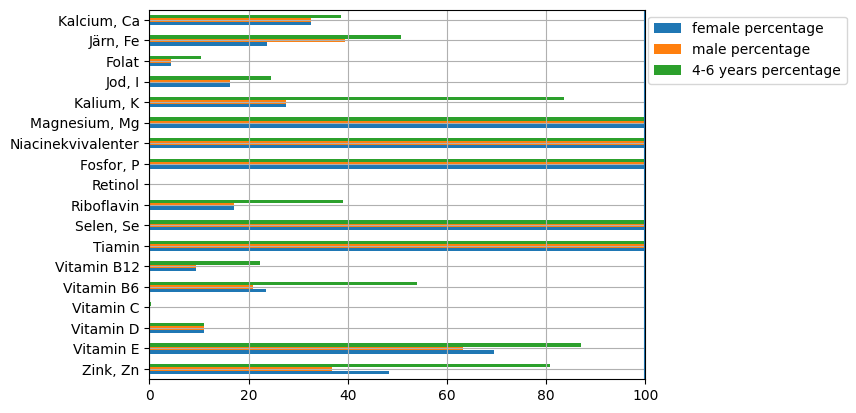

In [ ]:

for gen in rdi['Zink, Zn'].keys():
    mineral_df.loc[gen + ' percentage'] = rdi_per = mineral_df.loc['total'] / mineral_df.loc[gen] * 100

#ax = mineral_df['total'].plot.bar(rot=0)
rdi_per_labels = ['female percentage', 'male percentage', '4-6 years percentage']
ax = mineral_df.loc[rdi_per_labels].dropna(axis=1, how='all').transpose().plot.barh()
ax.legend(bbox_to_anchor=(1.42, 1))
ax.axvline(x=100)
ax.set_xlim([0, 100])
ax.grid()